In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [10]:
df.drop(columns=['Booking_ID'], inplace=True)

In [5]:
df.isnull().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [11]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'Booking_ID' and col != 'required_car_parking_space']

cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Booking_Status' and col != 'booking_status']
cat_cols.append('required_car_parking_space')

In [12]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [13]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'required_car_parking_space']

In [14]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled
29016,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.00,0,Canceled
29017,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.00,1,Not_Canceled
29018,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.00,0,Canceled


In [15]:
df.duplicated().sum()

np.int64(7661)

In [16]:
data  = df.copy(deep=True)

# Data analysis

In [17]:
def num_plot_dist(data, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, 5 * len(num_features)))
    if len(num_features) == 1:
        axes =[axes]
    for i, feature in enumerate(num_features):
        sns.histplot(data=data,x=feature, kde=True, ax=axes[i][0],palette='viridis')
        axes[i][0].set_title(f'Histogram of {feature}')
        sns.boxplot(x=data[feature], ax=axes[i][1])
        axes[i][1].set_title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

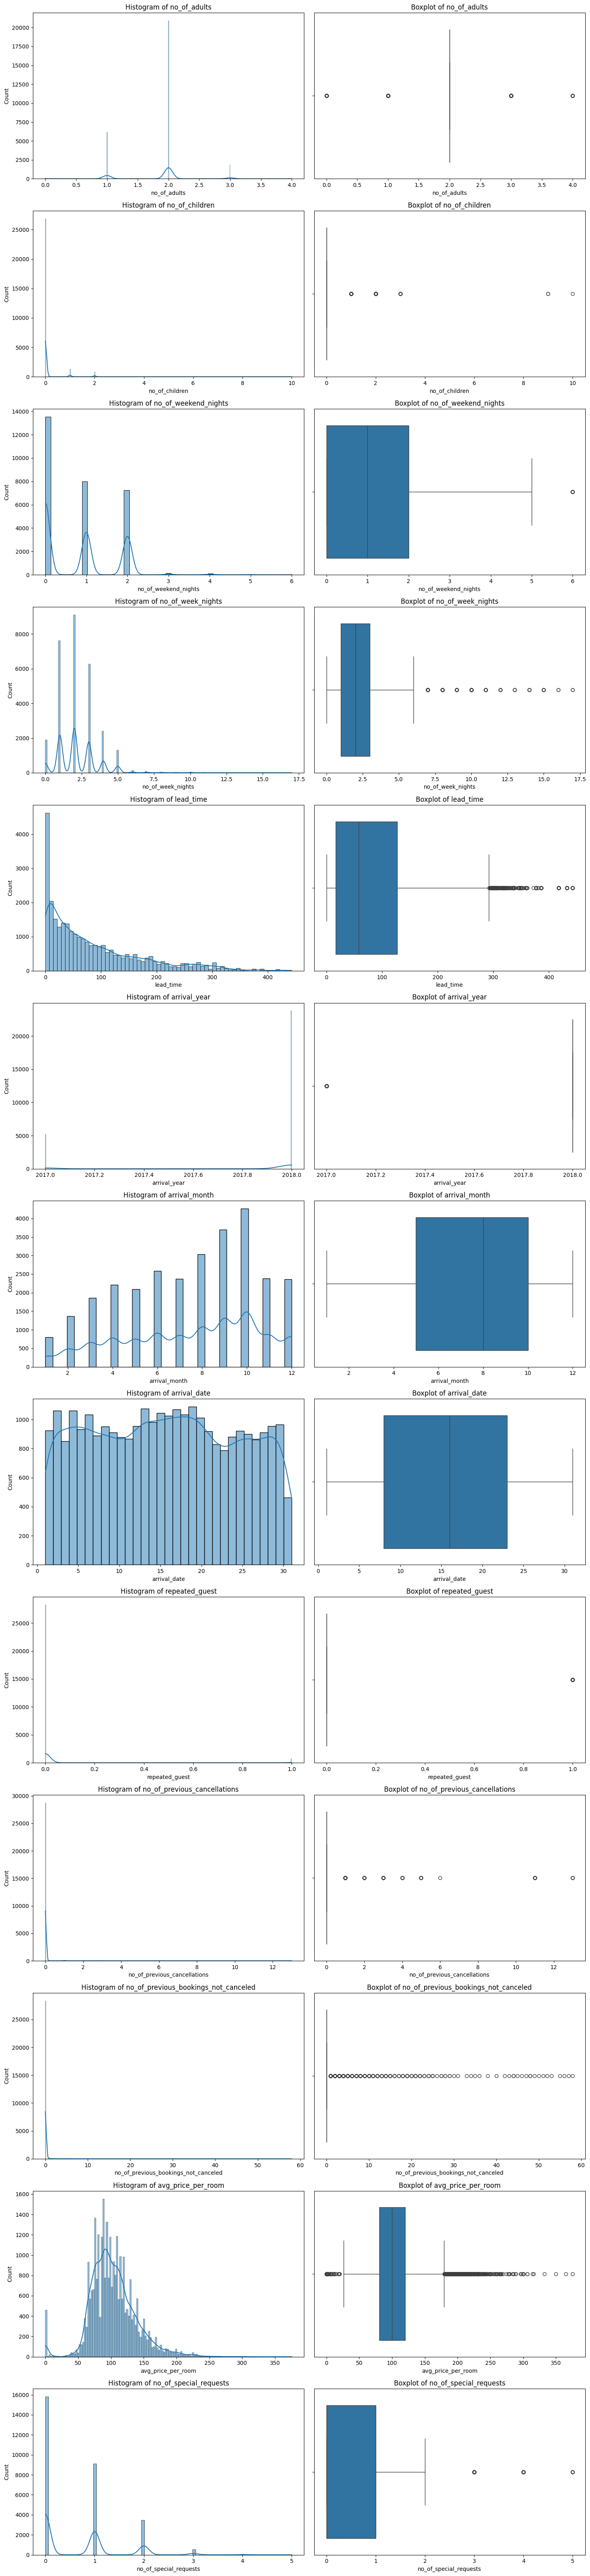

In [18]:
num_plot_dist(data, num_cols)

In [19]:
def cat_plot_dist(data, cat_features):
    fig, axes = plt.subplots(len(cat_features), 1, figsize=(10, 5 * len(cat_features)))
    if len(cat_features) == 1:
        axes = [axes]
    for i, feature in enumerate(cat_features):
        sns.countplot(y=data[feature], ax=axes[i], palette='viridis', order=data[feature].value_counts().index)
        axes[i].set_title(f'Countplot of {feature}')
    plt.tight_layout()
    plt.show()

In [20]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'required_car_parking_space']

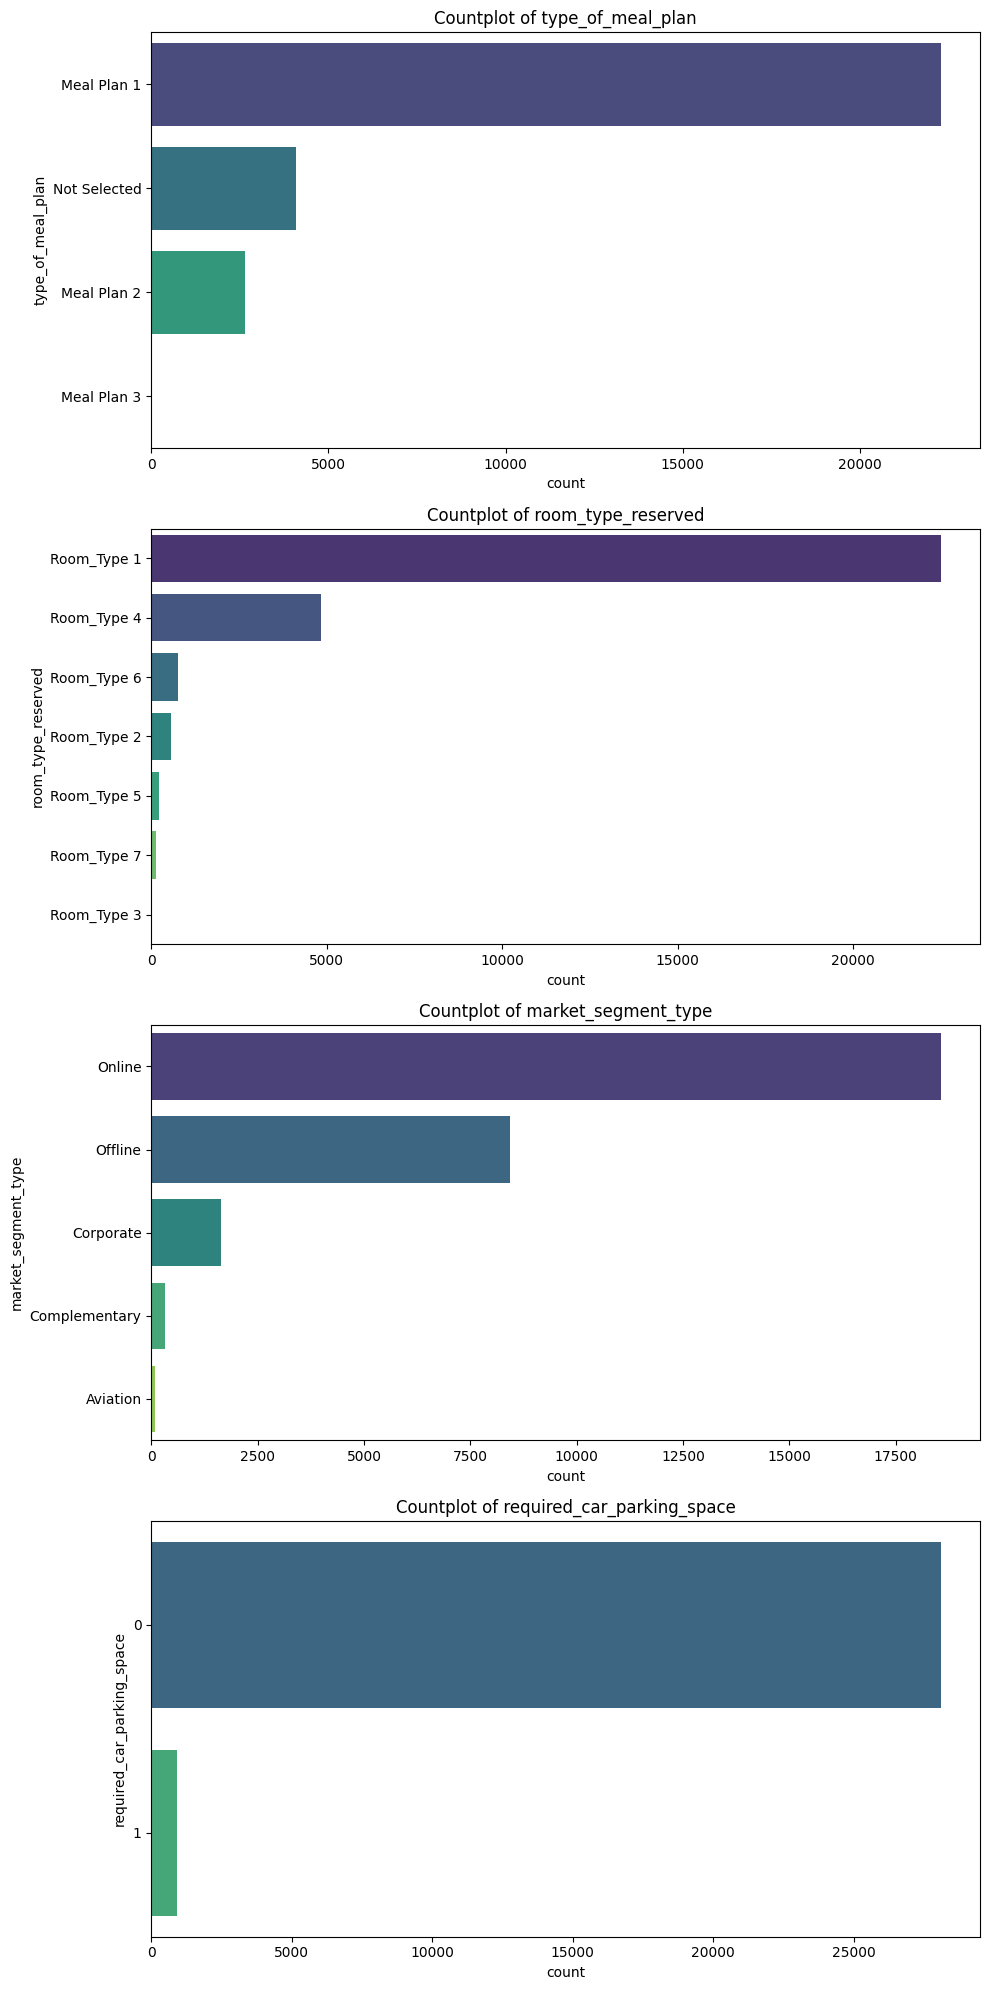

In [21]:
cat_plot_dist(data, cat_cols)

# Bivariate Aalysis

In [22]:
def plot_bivariate_num(df,target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axis = axes.flatten()
    for i, feature in enumerate(num_features):
        sns.boxplot(x=target, y=feature,data=df, ax=axis[i], palette='viridis')
        axis[i].set_title(f'Boxplot of {feature} by {target}')
    plt.tight_layout()
    plt.show()

In [24]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

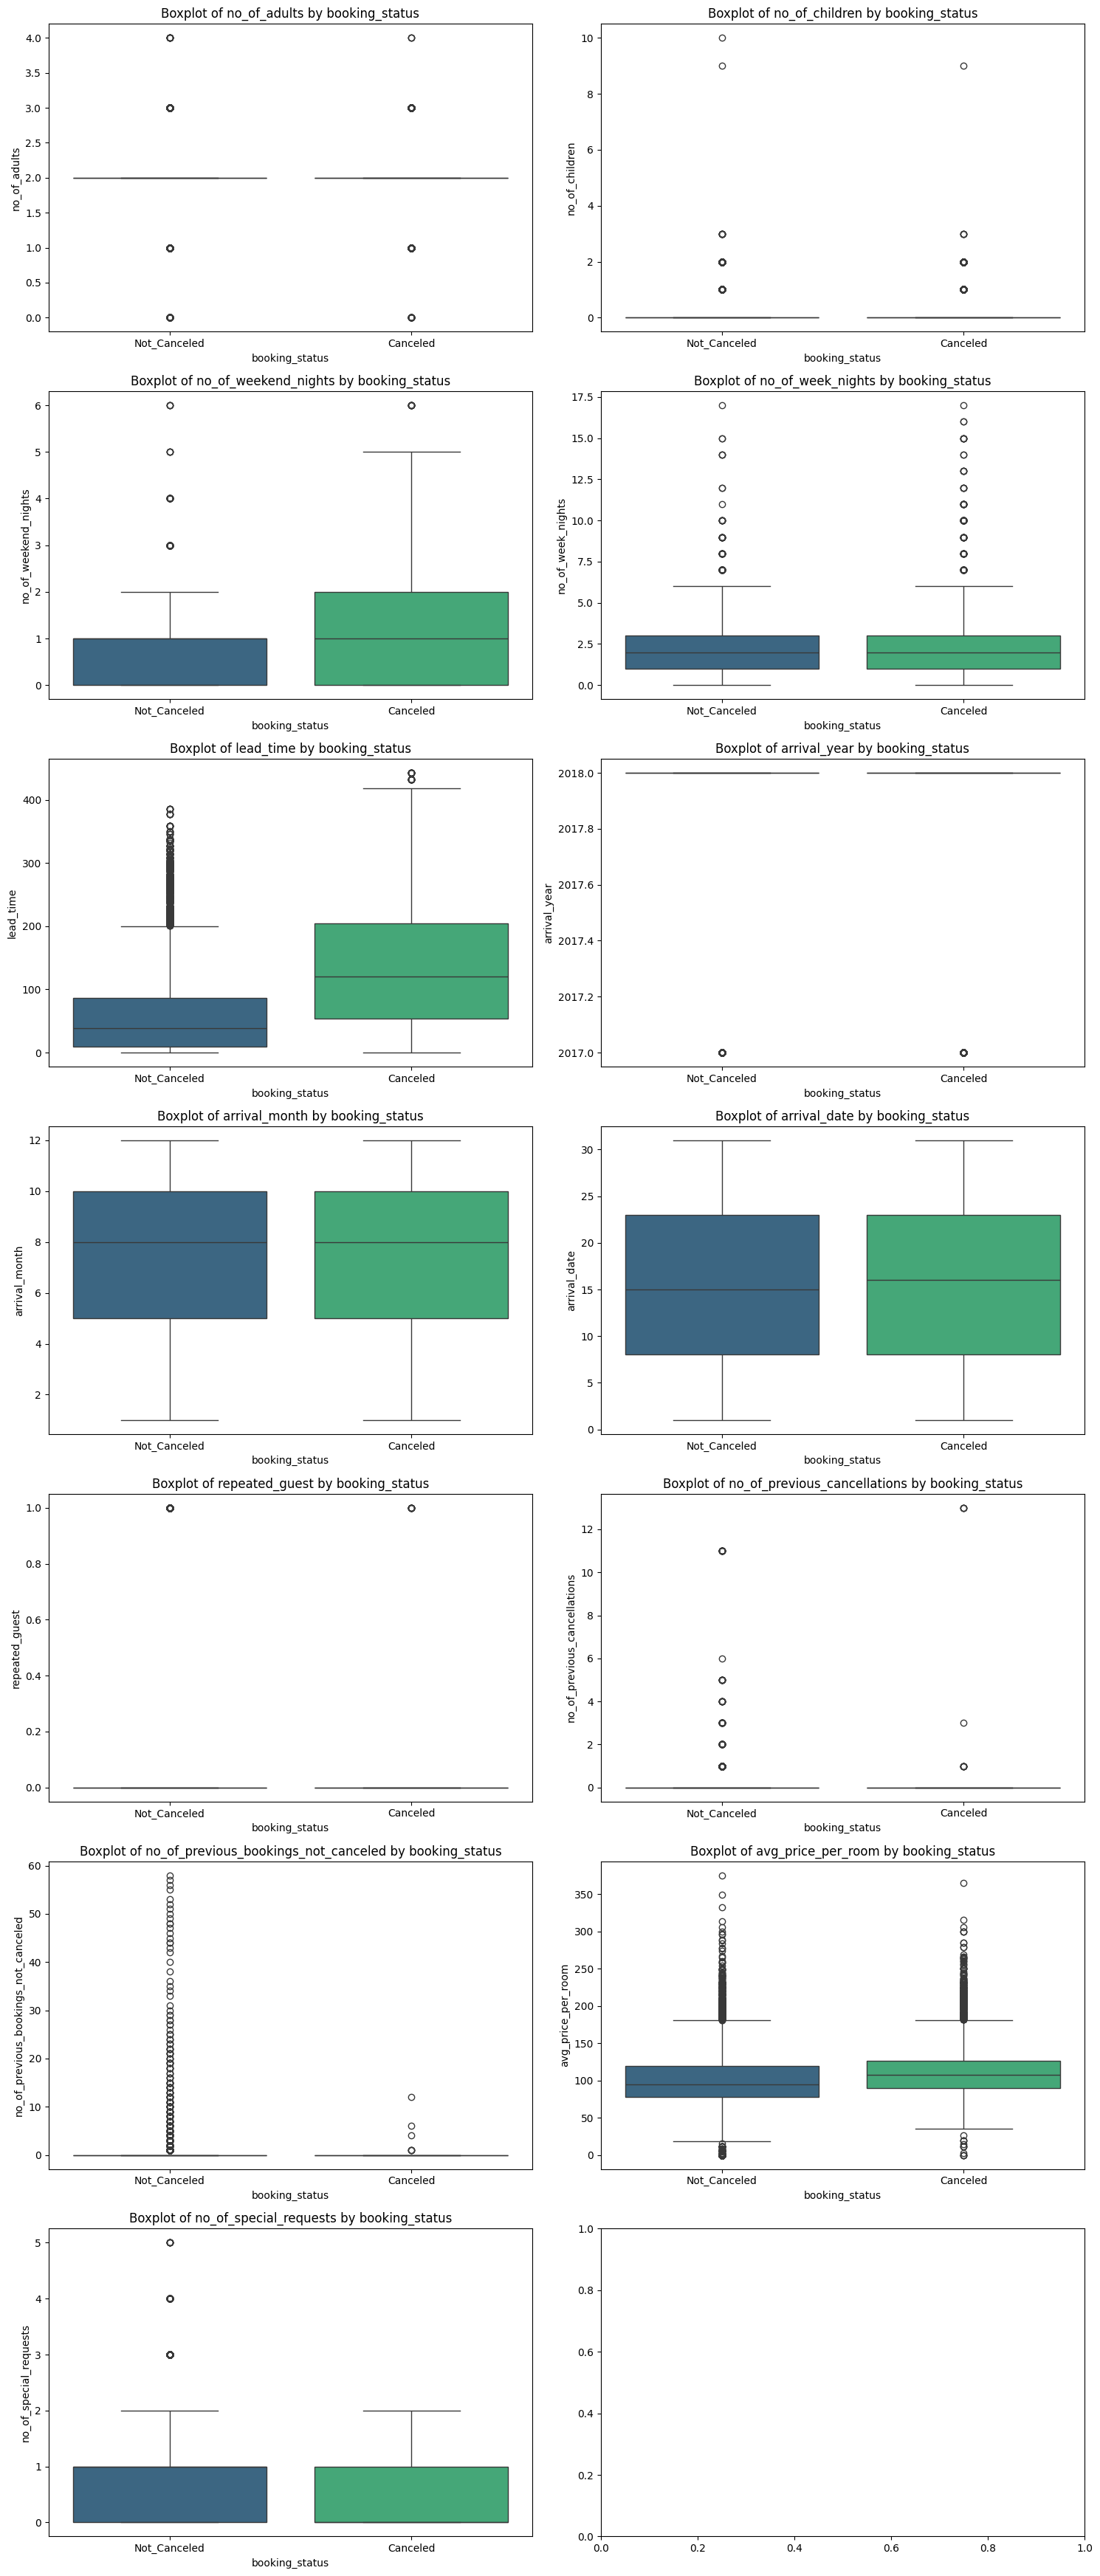

In [25]:
plot_bivariate_num(data,'booking_status', num_cols)

In [34]:
def plot_bivariate_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axis = axes.flatten()
    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, ax=axis[i], palette='Set2', order=df[feature].value_counts().index)
        axis[i].set_title(f'Countplot of {feature} by {target}')
        axis[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

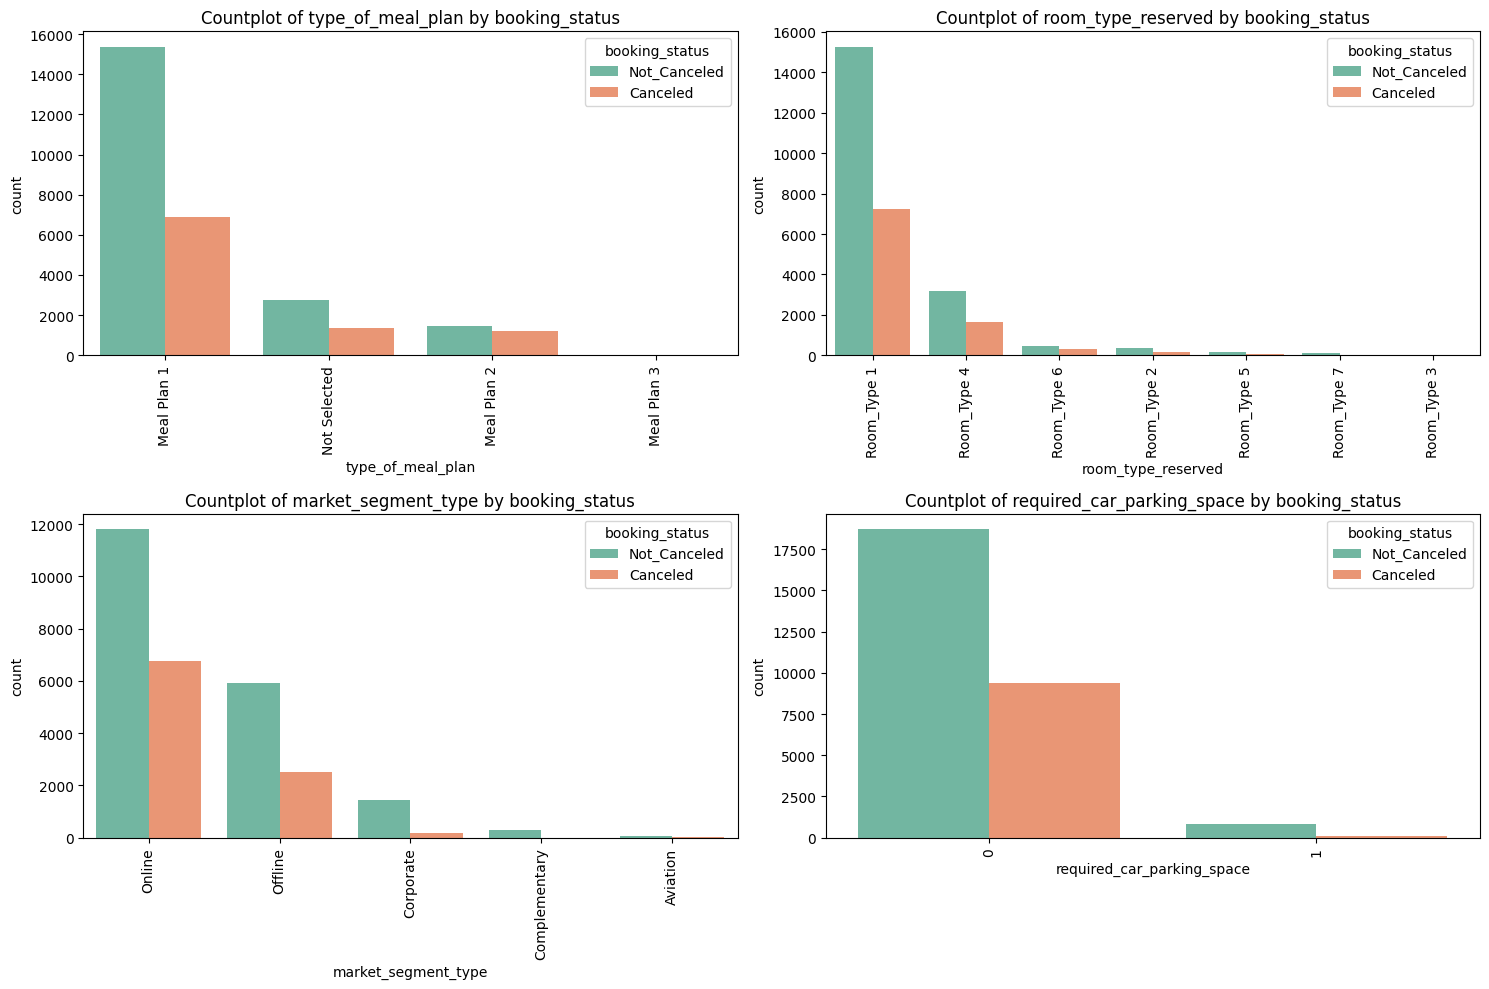

In [35]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

# Feature engineering

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
mappings ={}
for col in cat_cols+['booking_status']:
    data[col] = le.fit_transform(data[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [40]:
mappings

{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'room_type_reserved': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4),
  np.int64(5): np.int64(5),
  np.int64(6): np.int64(6)},
 'market_segment_type': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [41]:
#### Multi collinearity check


In [42]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.6 MB 20.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 20.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [44]:
vif

,Feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


In [45]:
# Our data doesnt have multicollinearity issue as all VIF values are below 5

In [47]:
df[num_cols].corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.023206,0.105348,0.107088,0.096849,0.076599,0.018676,0.021653,-0.193910,-0.047723,-0.119168,0.298806,0.186752
no_of_children,-0.023206,1.000000,0.029363,0.027730,-0.046830,0.049156,-0.003387,0.028185,-0.036217,-0.016429,-0.021245,0.339916,0.126538
no_of_weekend_nights,0.105348,0.029363,1.000000,0.170348,0.044089,0.052698,-0.011612,0.029413,-0.066445,-0.020146,-0.027981,-0.007783,0.059582
no_of_week_nights,0.107088,0.027730,0.170348,1.000000,0.154032,0.036798,0.037856,-0.007459,-0.097529,-0.029076,-0.044622,0.024255,0.045760
lead_time,0.096849,-0.046830,0.044089,0.154032,1.000000,0.141433,0.134737,0.002029,-0.138162,-0.045136,-0.078447,-0.064011,-0.101831
arrival_year,0.076599,0.049156,0.052698,0.036798,0.141433,1.000000,-0.339353,0.016373,-0.017384,0.005358,0.026980,0.176304,0.058387
arrival_month,0.018676,-0.003387,-0.011612,0.037856,0.134737,-0.339353,1.000000,-0.043967,0.005575,-0.037577,-0.005398,0.056038,0.108712
arrival_date,0.021653,0.028185,0.029413,-0.007459,0.002029,0.016373,-0.043967,1.000000,-0.017537,-0.010674,-0.000837,0.017877,0.018331
repeated_guest,-0.193910,-0.036217,-0.066445,-0.097529,-0.138162,-0.017384,0.005575,-0.017537,1.000000,0.390472,0.535062,-0.176156,-0.012914
no_of_previous_cancellations,-0.047723,-0.016429,-0.020146,-0.029076,-0.045136,0.005358,-0.037577,-0.010674,0.390472,1.000000,0.475414,-0.064755,-0.000653


Text(0.5, 1.0, 'Correlation Matrix')

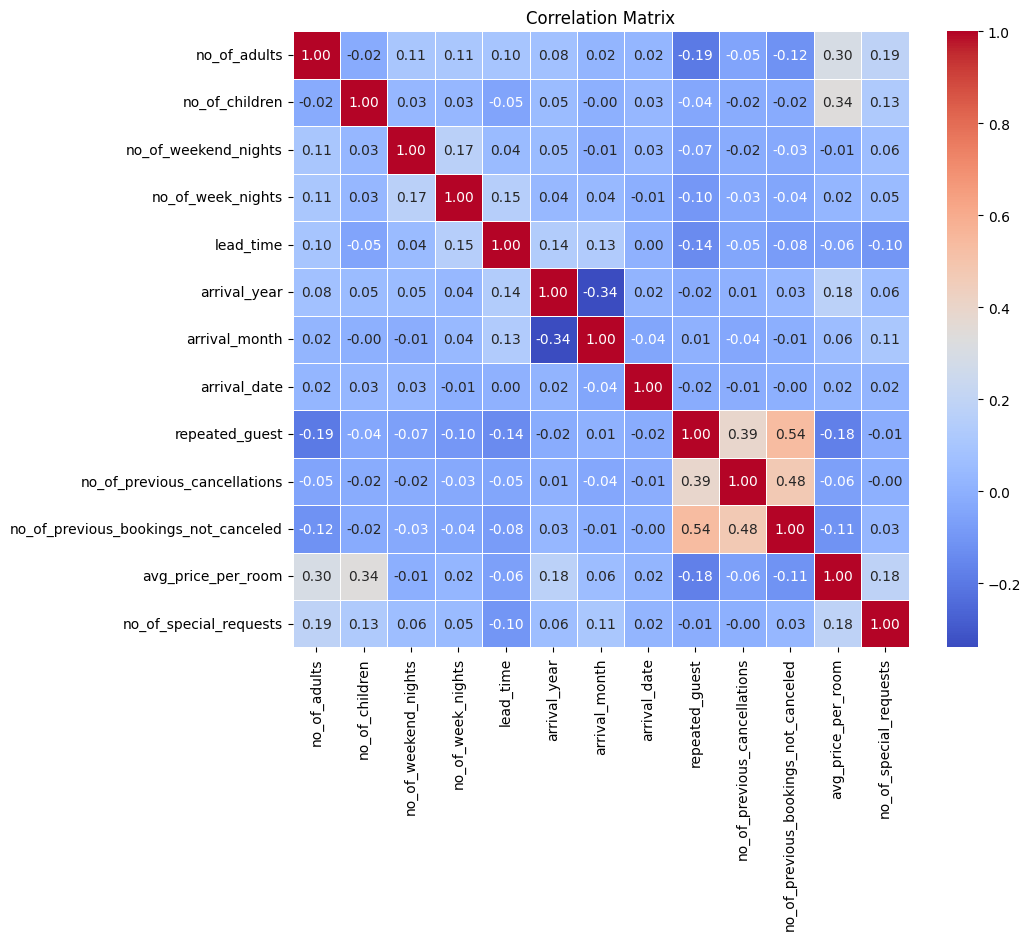

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True,linewidths=0.57)
plt.title("Correlation Matrix")

In [51]:
skewness = data[num_cols].skew()
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
dtype: float64

In [52]:
for col in num_cols:
    if abs(skewness[col]) > 5:
        data[col] = np.log1p(data[col])

In [53]:
data.skew()

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [54]:
## - handle the imbalanced data using SMOTE or ADASYN

In [56]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE
X = data.drop(columns=['booking_status'])
y = data['booking_status']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
pd.value_counts(y_resampled)

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [61]:
data_resampled =pd.concat([X_resampled, y_resampled], axis=1)

In [62]:
data_resampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39097,2,0,1,2,0,0,3,189,2018,10,28,4,0.0,0.0,0.0,109.800000,0,0
39098,2,1,0,1,0,0,0,11,2018,11,5,4,0.0,0.0,0.0,150.000000,1,0
39099,2,0,0,2,0,0,0,308,2018,11,25,3,0.0,0.0,0.0,52.000000,0,0
39100,2,0,0,2,1,0,0,377,2018,10,14,4,0.0,0.0,0.0,115.000000,1,0


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = data_resampled.drop(columns=['booking_status'])
y = data_resampled['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [64]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
model.feature_importances_

array([0.02191865, 0.00564003, 0.03239968, 0.04533551, 0.02062113,
       0.00879056, 0.01715212, 0.29650524, 0.02261663, 0.0865396 ,
       0.08476271, 0.05723918, 0.00494799, 0.00061815, 0.00214496,
       0.153361  , 0.13940688])

In [72]:
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [74]:
feature_importances_df['Cumulative Importance'] = feature_importances_df['Importance'].cumsum()*100

In [76]:
feature_importances_df = feature_importances_df.reindex(columns=['Feature', 'Importance', 'Cumulative Importance'])

In [77]:
feature_importances_df

,Feature,Importance,Cumulative Importance
7,lead_time,0.296505,29.650524
15,avg_price_per_room,0.153361,44.986623
16,no_of_special_requests,0.139407,58.927311
9,arrival_month,0.086540,67.581271
10,arrival_date,0.084763,76.057542
11,market_segment_type,0.057239,81.781459
3,no_of_week_nights,0.045336,86.315011
2,no_of_weekend_nights,0.032400,89.554979
8,arrival_year,0.022617,91.816642
0,no_of_adults,0.021919,94.008506


In [78]:
# Model selection based on feature importance

In [79]:
pip install xgboost lightgbm catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   --- ------------------------------------ 4.7/56.8 MB 22.7 MB/s eta 0:00:03
   ----- ---------------------------------- 7.9/56.8 MB 18.1 MB/s eta 0:00:03
   ------- -------------------------------- 10.5/56.8 MB 16.4 MB/s eta 0:00:03
   -------- ------------------------------- 12.6/56.8 MB 14.5 MB/s eta 0:00:04
   ---------- ----------------------------- 15.2/56.8 MB 14.1 MB/s eta 0:00:03
   ------------ --------------------------- 18.4/56.8 MB 14.3 MB/s eta 0:00:03
   --------------- ------------------------ 22.3/56.8 MB 14.8 MB/s eta 0:00:03
   ------------------ --------------------- 26.0/56.8 MB 15.3 MB/s eta 0:00:03
   --------------------- ------------------ 30.4/56.8 MB 15.9 MB/s eta 0:00:02
   ------------------------ --------------- 34.6/56.8 MB 16.3 MB/s eta 0:00:02
   --------------------------- ------------ 39.1/56.8 MB 16.7 MB/s eta 0:00:02



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),  
    "SVC": SVC()
}

In [83]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [84]:
for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(classification_report(y_test, y_pred, output_dict=True)['1']['precision'])
    metrics["Recall"].append(classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
    metrics["F1-Score"].append(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'])
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

[LightGBM] [Info] Number of positive: 15641, number of negative: 15640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500016 -> initscore=0.000064
[LightGBM] [Info] Start training from score 0.000064


In [85]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.921493,0.910973,0.934271,0.922475
2,XGBoost,0.903465,0.894869,0.914322,0.904491
4,CatBoost,0.902186,0.891851,0.915345,0.903446
3,LightGBM,0.892597,0.877335,0.912788,0.894710
8,Decision Tree,0.884158,0.880253,0.889258,0.884733
5,Gradient Boosting,0.841452,0.838661,0.845524,0.842078
9,KNN,0.819588,0.849510,0.776726,0.811490
6,AdaBoost,0.807953,0.814360,0.797698,0.805943
0,Logistic Regression,0.780079,0.788766,0.764962,0.776681
10,SVC,0.688275,0.658280,0.782864,0.715187


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
params_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}